# Final Project - Introduction to Data Science

**Team members:**

1. Nguyễn Hoàng Trung Kiên (Leader) - 22127478

2. Quách Trần Quán Vinh - 22127460

3. Ngô Hải Bằng - 22127460

# I. Data exploring

### Importing libraries

In [219]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from rapidfuzz import process
import seaborn as sns

## 0. Read data

In [220]:
df = pd.read_csv('../data/houses.csv')
df

,Price,Rooms,Type,Status,Parking Spaces,Land Size,Building Size,Architecture Style,County,Provider
0,"USD $2,200 per month","3 bedroom(s), 2 bathroom(s)",House,Active,NaN,NaN,136.20 m2,Other,Mohave,"Black Mountain Valley Realty, Inc"
1,"USD $3,000 per month","2 bedroom(s), 3 bathroom(s)",Apartment,Active,NaN,161.87 m2,205.13 m2,Other,PHILADELPHIA,Compass
2,"USD $1,195 per month","1 bedroom(s), 1 bathroom(s)",Apartment,Active,NaN,768.90 m2,NaN,Other,PHILADELPHIA,OCF Realty
3,"USD $8,000 per month","4 bedroom(s), 3 bathroom(s)",Townhouse,Active,NaN,728.43 m2,213.68 m2,Other,Ventura,eXp Realty of California Inc.
4,"USD $5,600 per month","4 bedroom(s), 3 bathroom(s), 1 basement(s)",House,Active,4.0,849.84 m2,266.72 m2,Colonial,FAIRFAX,Keller Williams Fairfax Gateway
...,...,...,...,...,...,...,...,...,...,...
3995,"USD $2,050 per month","3 bedroom(s), 2 bathroom(s)",Other,Active,NaN,566.56 m2,175.03 m2,Contemporary,Maricopa,Realty ONE Group
3996,"USD $1,300 per month","2 bedroom(s), 1 bathroom(s)",Other,Active,NaN,930.78 m2,104.98 m2,Ranch,Maricopa,Real Living SJ Fowler Real Estate
3997,"USD $3,499 per month","4 bedroom(s), 3 bathroom(s)",Other,Active,NaN,890.31 m2,345.79 m2,Contemporary,Maricopa,HomeSmart
3998,"USD $10,900 per month","5 bedroom(s), 7 bathroom(s)",Other,Active,NaN,"1,254.53 m2",653.94 m2,Other,Maricopa,Russ Lyon Sotheby's International Realty


## 1. Meaning of columns/rows
Each row corresponds to a house with the following features:
- **Price:** Monthly rental price of the property in USD.
- **Rooms:** Number of bedrooms and bathrooms (may include basements).
- **Type:** Type of property (e.g., House, Apartment, Townhouse, etc.).
- **Status:** Current status of the property (e.g., "Active").
- **Parking Spaces:** Number of parking spaces (can be empty if unknown).
- **Land Size:** Size of the land (in $m^2$).
- **Building Size:** Size of the building (in $m^2$).
- **Architecture Style:** Style of the property’s architecture (e.g., Colonial, Contemporary, Other).
- **County:** County in which the property is located.
- **Provider:** Name of the real estate agency or company listing the property.


##  2. Data conversion
What is the current data type of each column? Are there columns having inappropriate data types?

In [221]:
df.dtypes

Price                  object
Rooms                  object
Type                   object
Status                 object
Parking Spaces        float64
Land Size              object
Building Size          object
Architecture Style     object
County                 object
Provider               object
dtype: object

As we can see, there are some inappropriate type for some features.

- First, `Price`, `Building Size` and `Land Size` are currently in string type, so we need to convert them to float.

In [222]:
for i in range(len(df['Price'])):
    if df['Price'][i] != df['Price'][i]:
        df['Price'] = df['Price'].apply(lambda x: float(x.split('$')[1].split(' ')[0].replace(',', '')) if isinstance(x, str) else x)

In [223]:
for i in range(len(df['Building Size'])):
    if df['Building Size'][i] != df['Building Size'][i]:
        df['Building Size'] = df['Building Size'].apply(lambda x: float(x.split(' ')[0].replace(',', '')) if isinstance(x, str) else x)

In [224]:
for i in range(len(df['Land Size'])):
    if df['Land Size'][i] != df['Land Size'][i]:
        df['Land Size'] = df['Land Size'].apply(lambda x: float(x.split(' ')[0].replace(',', '')) if isinstance(x, str) else x)

- Then, `Rooms` has to be splitted into 3 columns namely `Bedrooms`, `Bathrooms`, `Livingrooms` and `Basements`

In [225]:
bedrooms = df['Rooms'].apply(lambda x: int(re.search(r'(\d+) bedroom\(s\)', x).group(1)) if isinstance(x, str) and re.search(r'(\d+) bedroom\(s\)', x) else np.nan)
bathrooms = df['Rooms'].apply(lambda x: int(re.search(r'(\d+) bathroom\(s\)', x).group(1)) if isinstance(x, str) and re.search(r'(\d+) bathroom\(s\)', x) else np.nan)
livingrooms = df['Rooms'].apply(lambda x: int(re.search(r'(\d+) livingroom\(s\)', x).group(1)) if isinstance(x, str) and re.search(r'(\d+) livingroom\(s\)', x) else np.nan)
basements = df['Rooms'].apply(lambda x: int(re.search(r'(\d+) basement\(s\)', x).group(1)) if isinstance(x, str) and re.search(r'(\d+) basement\(s\)', x) else np.nan)

df['Bedrooms'] = bedrooms
df['Bathrooms'] = bathrooms
df['Livingrooms'] = livingrooms
df['Basements'] = basements

df = df.drop(columns=['Rooms'])

In [226]:
df.dtypes

Price                 float64
Type                   object
Status                 object
Parking Spaces        float64
Land Size             float64
Building Size         float64
Architecture Style     object
County                 object
Provider               object
Bedrooms              float64
Bathrooms             float64
Livingrooms           float64
Basements             float64
dtype: object

The data types seem normal.

# II. Data preprocessing
## 1. Data cleaning
### 1.1. Handle missing data

Since `Price` column is the target, we will remove the records that misses `Price` value first.

In [227]:
df.dropna(subset=['Price'], inplace=True)

We check each columns' missing ratio

,Total,Percentage
Basements,3673,0.923328
Livingrooms,3418,0.859226
Parking Spaces,2768,0.695827
Land Size,1563,0.392911
Building Size,408,0.102564
Bedrooms,302,0.075918
Provider,215,0.054047
Bathrooms,204,0.051282
County,155,0.038964
Price,0,0.000000


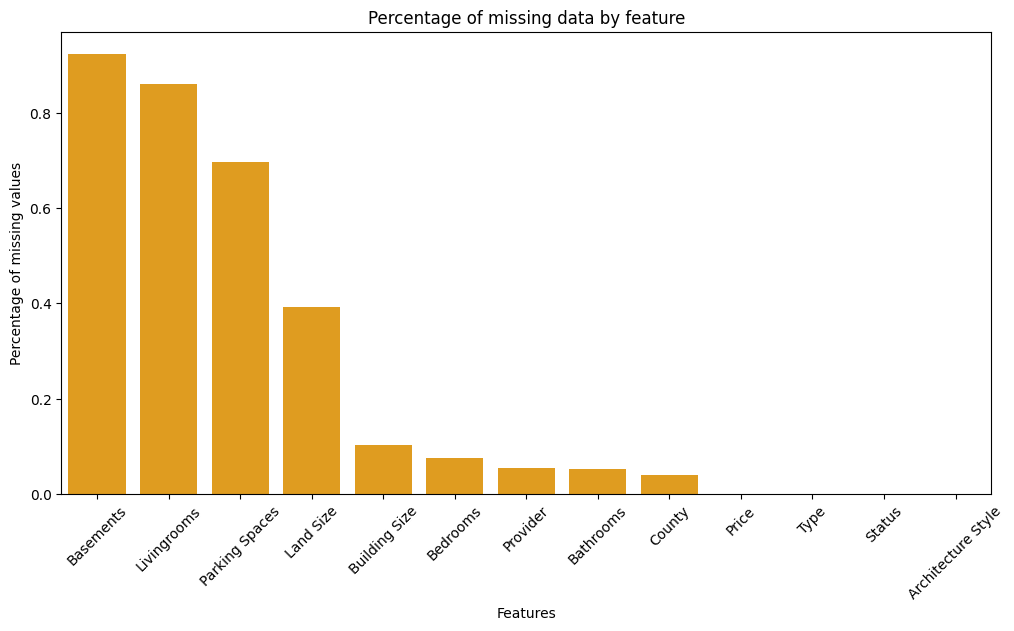

In [228]:
total = df.isna().sum().sort_values(ascending=False)
percentage = (df.isna().sum()/df.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])

f = plt.figure(figsize=(12, 6))
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], color='orange')
plt.xlabel('Features')
plt.ylabel('Percentage of missing values')
plt.title('Percentage of missing data by feature')
plt.xticks(rotation=45)

missing_data

As we can see, the percentages of missing values of `Parking Spaces`, `Livingrooms` and `Basements` are greater than 50%.

Since basements and parking spaces are not the basic rooms that one house should have, but living rooms, bathrooms and bedrooms are, so:
- If missing values are in ```Parking Spaces``` and ```Basements```, we fill it by 0.
- If missing values are in ```Livingrooms```, ```Bedrooms``` and ```Bathrooms``` , we fill by ```median``` for ```Bedrooms``` and ```Bathrooms``` because of their low missing rate. For ```Livingrooms```, we have to check its distribution first.

In [229]:
df['Parking Spaces'] = df['Parking Spaces'].fillna(0)
df['Basements'] = df['Basements'].fillna(0)

In [230]:
df['Bedrooms'] = df['Bedrooms'].fillna(df['Bedrooms'].median())
df['Bathrooms'] = df['Bathrooms'].fillna(df['Bathrooms'].median())

In [231]:
print(df['Livingrooms'].value_counts(dropna=False))

Livingrooms
NaN    3418
1.0     549
2.0      11
Name: count, dtype: int64


Most of ```Livingrooms``` values are 1 so we fill its missing values by 1.

In [232]:
df['Livingrooms'] = df['Livingrooms'].fillna(1)

For the missing categorical columns, we fill them by ```mode```.

In [233]:
cates = ['Provider', 'County']
for cate in cates:
    df[cate] = df[cate].fillna(df[cate].mode()[0])

After experimenting by all approriate methods to fill ```Building Size``` and ```Land Size```, we can only choose to fill it by ```median``` because the other columns are not related to them and the distributions of those columns are skewed (as shown in the plot below). 

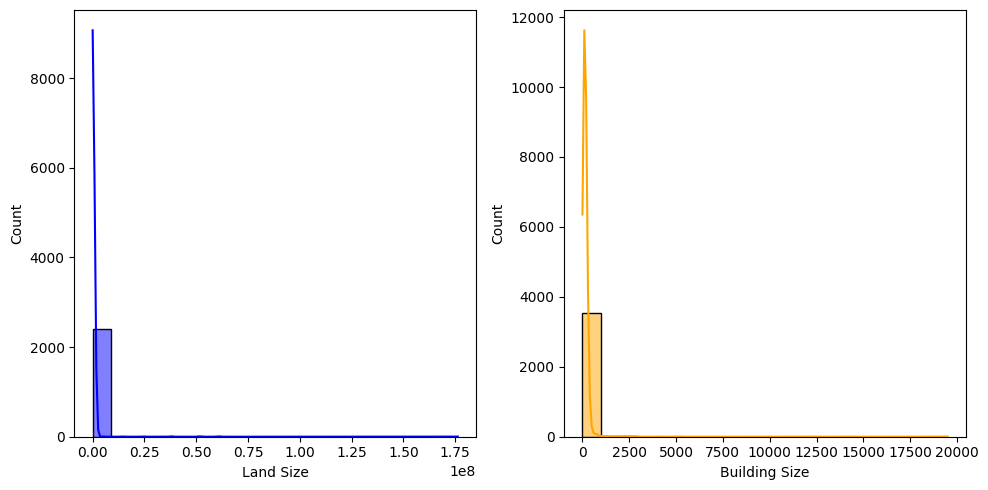

In [234]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))
sns.histplot(x=df['Land Size'], ax=axes[0], kde=True, bins=20, color='blue')
sns.histplot(x=df['Building Size'], ax=axes[1], kde=True, bins=20, color='orange')
plt.tight_layout()
plt.show()

In [235]:
df['Building Size'] = df['Building Size'].fillna(df['Building Size'].median())
df['Land Size'] = df['Land Size'].fillna(df['Land Size'].median())

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3978 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               3978 non-null   float64
 1   Type                3978 non-null   object 
 2   Status              3978 non-null   object 
 3   Parking Spaces      3978 non-null   float64
 4   Land Size           3978 non-null   float64
 5   Building Size       3978 non-null   float64
 6   Architecture Style  3978 non-null   object 
 7   County              3978 non-null   object 
 8   Provider            3978 non-null   object 
 9   Bedrooms            3978 non-null   float64
 10  Bathrooms           3978 non-null   float64
 11  Livingrooms         3978 non-null   float64
 12  Basements           3978 non-null   float64
dtypes: float64(8), object(5)
memory usage: 435.1+ KB


Finally, there is no more missing values.

### 1.2. Data Cleaning

Column ```Status``` doesn't seem to have much meaningful information. We first check its values.

In [237]:
print(df['Status'].value_counts(dropna=False))

Status
Active     3966
Pending      12
Name: count, dtype: int64


There are 12 records that are ```Pending```. Since we just need currently available records, the row that has ```Pending``` status should be eliminated, and the column ```Status``` should be removed after that.

In [238]:
df = df[df['Status'] != 'Pending']
df = df.drop(columns=['Status'])

Column ```Provider``` is not helpful also since it has so many distinct categorical values and hard to preprocess, so it should be eliminated also.

In [239]:
df = df.drop(columns=['Provider'])

Column ```County``` stores the county of US where house record locates at. But for simplicity and avoiding high-dimensionality, we convert county into state to reduce the distinct values. We do it with ```uscounties.csv``` dataset, which is retrieved at [simplemaps](https://simplemaps.com/data/us-counties) website, helps to match county with state using ```fuzzymatching```.

Read counties data

In [240]:
counties_df = pd.read_csv('../data/uscounties.csv')

Clean text in ```County``` column for easily matching

In [241]:
def clean_name(name):
    if pd.isna(name):
        return ''
    name = name.lower().strip()
    name = name.replace(' county', '').replace(' co.', '').replace('parish', '').replace('.', '')
    name = ' '.join(name.split())
    return name

df['County'] = df['County'].apply(clean_name)

Match county with state and create ```State``` column

In [242]:
county_list = counties_df['county'].tolist()

def match_county(county_name, county_list):
    match = process.extractOne(county_name, county_list, score_cutoff=70)  
    if match:
        matched_county = match[0]
        state_name = counties_df[counties_df['county'] == matched_county]['state_name'].values[0]
        return state_name
    else:
        return 'Other'

df['State'] = df['County'].apply(lambda x: match_county(x, county_list))

Drop ```County``` column

In [243]:
df = df.drop(columns=['County'])

### 1.3. Handle Duplicate Rows
Is there any duplicated rows (same features)? If yes, remove those rows.

In [244]:
df.duplicated(df.columns.difference(['Price'])).sum()

316

There are duplicated records

Remove duplicates

In [245]:
df.drop_duplicates(df.columns.difference(['Price']), keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)

Extract data without encoding categorical columns.

In [246]:
df.to_csv('../data/houses_preprocessed.csv', index=False)

## 2. Encode categorical columns

We use ```One-hot encoding``` for categorical columns

In [247]:
cates = ['State', 'Architecture Style', 'Type']
df = pd.get_dummies(df, columns=cates, dtype=int)

In [248]:
df

,Price,Parking Spaces,Land Size,Building Size,Bedrooms,Bathrooms,Livingrooms,Basements,State_Alabama,State_Alaska,...,Architecture Style_Split Level,Architecture Style_Stick,Architecture Style_Tudor,Architecture Style_Victorian,Type_Apartment,Type_House,Type_Multi family,Type_Other,Type_Rural,Type_Townhouse
0,2200.0,0.0,668.44,136.20,3.0,2.0,1.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3000.0,0.0,161.87,205.13,2.0,3.0,1.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1195.0,0.0,768.90,133.04,1.0,1.0,1.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,8000.0,0.0,728.43,213.68,4.0,3.0,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5600.0,4.0,849.84,266.72,4.0,3.0,1.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,2050.0,0.0,566.56,175.03,3.0,2.0,1.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3646,1300.0,0.0,930.78,104.98,2.0,1.0,1.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3647,3499.0,0.0,890.31,345.79,4.0,3.0,1.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3648,10900.0,0.0,1254.53,653.94,5.0,7.0,1.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0


Encoded dataset

In [249]:
df.to_csv('../data/houses_encoded.csv', index=False)